In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [23]:
le = LabelEncoder()

In [24]:
df['Geography'] = le.fit_transform(df['Geography'])

In [25]:
df['Gender'] = le.fit_transform(df['Gender'])

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

C:\Users\Atharva\AppData\Local\Temp\ipykernel_29048\2556138968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


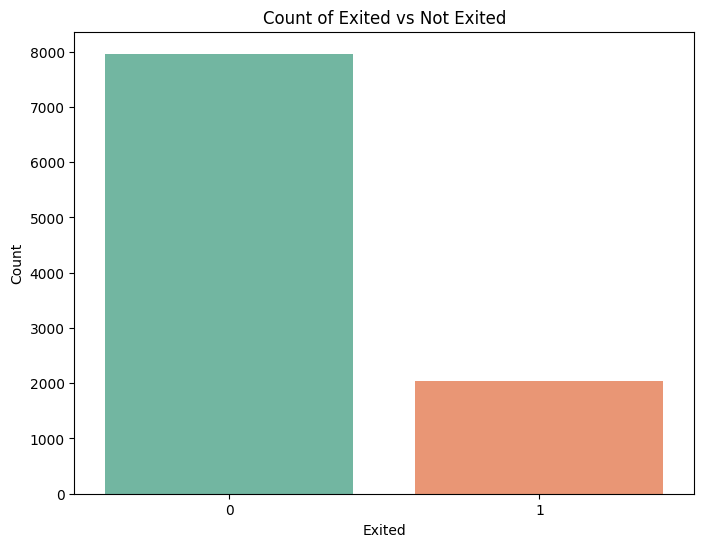

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Count of Exited vs Not Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [32]:
X = df.drop('Exited',axis =1)
y = df['Exited']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log = LogisticRegression()

In [55]:
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred=log.predict(X_test)


In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [60]:
accuracy_score(y_test,y_pred)

0.8005

In [61]:
precision_score(y_test,y_pred)

0.5303030303030303

In [63]:
recall_score(y_test,y_pred)

0.171990171990172

In [64]:
f1_score(y_test,y_pred)

0.2597402597402597

# Handlind Imbalanced Data Set

## Oversampling from SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [68]:
X_res , y_res = SMOTE().fit_resample(X,y)

In [71]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# SVC

In [72]:
from sklearn import svm

In [73]:
svm = svm.SVC()

In [74]:
svm.fit(X_train,y_train)

SVC()

In [75]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8575

# K Neighbour

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred3=knn.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred3)

0.834

# Decision Tree

In [82]:
from sklearn.tree  import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred4 = dt.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred4)

0.785

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier()

In [94]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y_pred5 = rf.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred5)

0.862

# Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gb = GradientBoostingClassifier()

In [107]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [108]:
y_pred6 = gb.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred6)

0.8635

# Visualization of Models

In [112]:
final_data = pd.DataFrame({
    'Models': ['log', 'svm', 'knn', 'df', 'rf', 'gb'],
    'ACC': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6),
    ]
})

print(final_data)

  Models     ACC
0    log  0.8005
1    svm  0.8575
2    knn  0.8340
3     df  0.7850
4     rf  0.8620
5     gb  0.8635


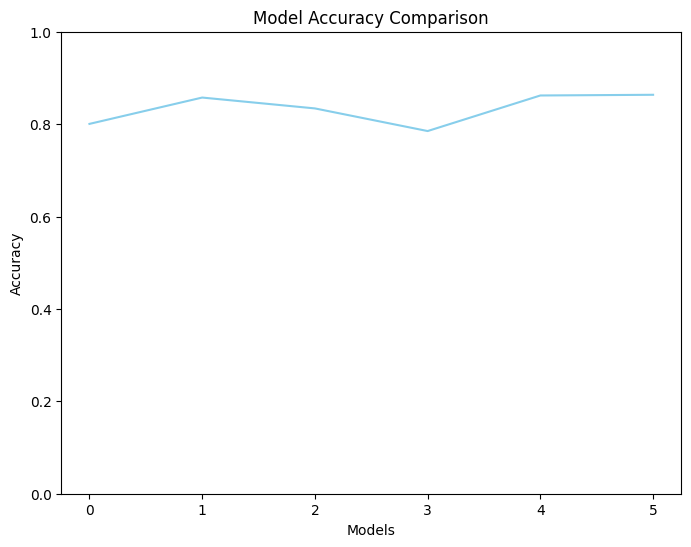

In [129]:
final_data.plot(kind='line', legend=False, figsize=(8, 6), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.xticks(rotation=0)
plt.show()

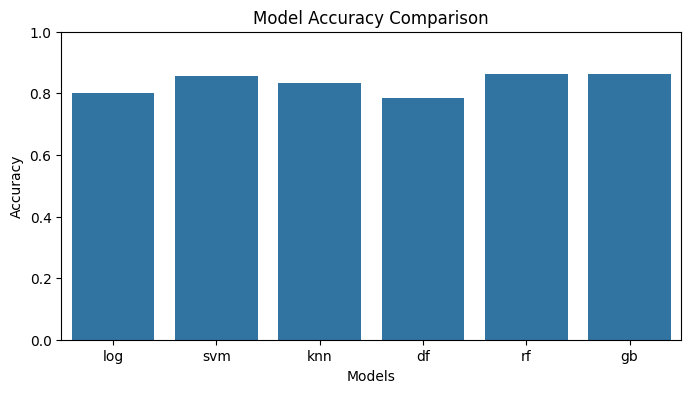

In [122]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()